In [1]:
import pandas as pd

# Load the dataset to analyze its structure
file_path = 'vgchartz-2024.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows and general information about the dataset
data_info = dataset.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [2]:
dataset.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [4]:
dataset.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [5]:
dataset_cleaned = dataset.drop(columns=['last_update', 'img'])

In [6]:
dataset_cleaned.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06


In [7]:
if 'developer' in dataset_cleaned.columns:
    most_frequent_developer = dataset_cleaned['developer'].mode()[0] 
    dataset_cleaned['developer'] = dataset_cleaned['developer'].fillna(most_frequent_developer)

In [ ]:
if 'release_date' in dataset_cleaned.columns:
    most_frequent_date = dataset_cleaned['release_date'].mode()[0] 
    dataset_cleaned['release_date'] = dataset_cleaned['release_date'].fillna(most_frequent_date)

In [11]:
from sklearn.impute import SimpleImputer

# Define the numerical columns where NaN values need to be replaced

columns_median = ['critic_score','total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

median_imputer = SimpleImputer(strategy='median')

# Apply median imputation one by one to columns that need median
for col in columns_median:
    dataset_cleaned[col] = median_imputer.fit_transform(dataset_cleaned[[col]])

In [ ]:
dataset_cleaned.isnull().sum()

In [14]:
dataset_cleaned.head(5)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.5,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06


In [55]:
dataset_cleaned['genre'].unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

In [ ]:
dataset_cleaned['release_date'] = pd.to_datetime(dataset_cleaned['release_date'], errors='coerce')  # Handle invalid dates
dataset_cleaned['release_year'] = dataset_cleaned['release_date'].dt.year  # Extract year

In [ ]:
dataset_cleaned=dataset_cleaned.drop(columns=['release_date'])

Data Encode

In [56]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['title', 'console', 'genre', 'publisher', 'developer']

# Create a DataFrame to store the encoded data
encoded_data = pd.DataFrame()

# Initialize a dictionary to store LabelEncoders for each column
label_encoders = {}

# Loop through each categorical column and encode
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()  # Initialize LabelEncoder
    encoded_data[col] = label_encoders[col].fit_transform(dataset_cleaned[col].astype(str))  # Encode and store in encoded_data





In [57]:

# Drop the original categorical columns and join with encoded data
data = dataset_cleaned.drop(columns=categorical_columns).join(encoded_data)

In [58]:
data.head(5)

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,title,console,genre,publisher,developer
0,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,13724,54,0,2445,6366
1,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,13724,55,0,2445,6366
2,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,13736,53,0,2445,6366
3,7.5,15.86,9.06,0.06,5.33,1.42,2013-09-17,13724,73,0,2445,6366
4,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,5271,55,15,101,7828


Correlation Matrix and drop highly crr

In [62]:
correlation_matrix = data.corr()
# Identify columns with high correlation (> 0.9) excluding the diagonal
correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_columns.add(colname)

# Drop the correlated columns
data = data.drop(columns=correlated_columns)

In [64]:
data.head()

,critic_score,total_sales,jp_sales,other_sales,title,console,genre,publisher,developer,release_year
0,9.4,20.32,0.99,3.12,13724,54,0,2445,6366,2013
1,9.7,19.39,0.60,3.02,13724,55,0,2445,6366,2014
2,9.6,16.15,0.47,1.78,13736,53,0,2445,6366,2002
3,7.5,15.86,0.06,1.42,13724,73,0,2445,6366,2013
4,8.1,15.09,0.41,2.44,5271,55,15,101,7828,2015


Cleaned Dataset


In [30]:
data.to_csv('cleaned_dataset.csv', index=False)

In [65]:
print(data.describe())


       critic_score   total_sales      jp_sales   other_sales         title  \
count  64016.000000  64016.000000  64016.000000  64016.000000  64016.000000   
mean       7.470837      0.187722      0.046544      0.017808  19985.633592   
std        0.478271      0.451266      0.057952      0.063143  11530.692320   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.500000      0.120000      0.040000      0.010000   9886.750000   
50%        7.500000      0.120000      0.040000      0.010000  20118.500000   
75%        7.500000      0.120000      0.040000      0.010000  30144.000000   
max       10.000000     20.320000      2.130000      3.120000  39797.000000   

            console         genre     publisher     developer  release_year  
count  64016.000000  64016.000000  64016.000000  64016.000000  64016.000000  
mean      48.025025      9.261044   1823.973100   4670.681455   2004.998235  
std       18.631587      6.110036   1042.416413   2604

Scale for Numarica column

In [66]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns that need scaling
numerical_columns = ['critic_score', 'total_sales', 'jp_sales', 'other_sales', 'release_year']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only to the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data.describe())  # Check the result


       critic_score   total_sales      jp_sales   other_sales         title  \
count  6.401600e+04  6.401600e+04  6.401600e+04  6.401600e+04  64016.000000   
mean   2.543995e-16 -1.740395e-16 -3.196643e-17  1.598322e-17  19985.633592   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  11530.692320   
min   -1.352975e+01 -4.159922e-01 -8.031439e-01 -2.820308e-01      0.000000   
25%    6.097639e-02 -1.500716e-01 -1.129157e-01 -1.236581e-01   9886.750000   
50%    6.097639e-02 -1.500716e-01 -1.129157e-01 -1.236581e-01  20118.500000   
75%    6.097639e-02 -1.500716e-01 -1.129157e-01 -1.236581e-01  30144.000000   
max    5.288177e+00  4.461324e+01  3.595150e+01  4.913024e+01  39797.000000   

            console         genre     publisher     developer  release_year  
count  64016.000000  64016.000000  64016.000000  64016.000000  6.401600e+04  
mean      48.025025      9.261044   1823.973100   4670.681455 -4.038426e-15  
std       18.631587      6.110036   1042.416413   2604

Train And Test

In [67]:
from sklearn.model_selection import train_test_split

# Set 'genre' as the target column
X = data.drop(columns=['genre'])  # Features
y = data['genre']  # Target (genre)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=100)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.1616
Precision: 0.0558
F1 Score: 0.0779


c:\Users\tasmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tasmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


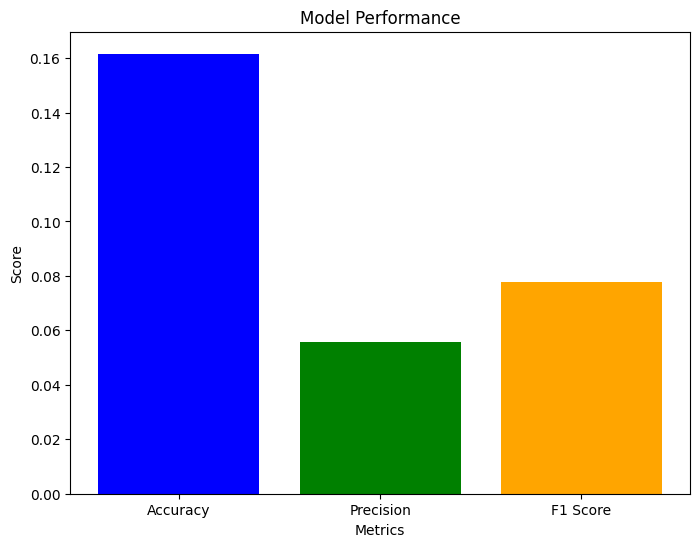

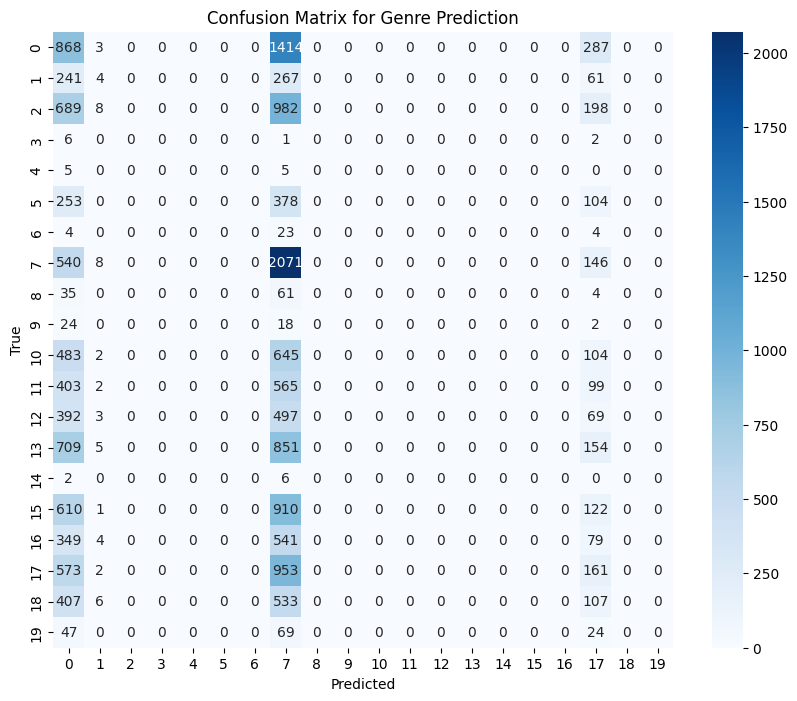

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Metrics values
metrics = ['Accuracy', 'Precision', 'F1 Score']
scores = [accuracy, precision, f1]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance')

# Display the plot
plt.show()


# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Genre Prediction')

# Display the plot
plt.show()

Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')



Accuracy: 0.4686
Precision: 0.4657
F1 Score: 0.4645


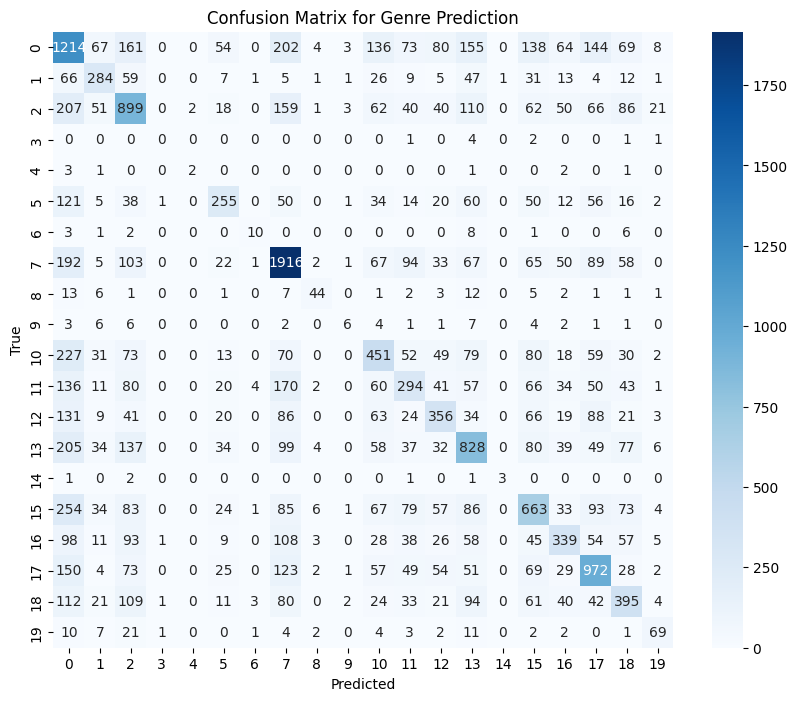

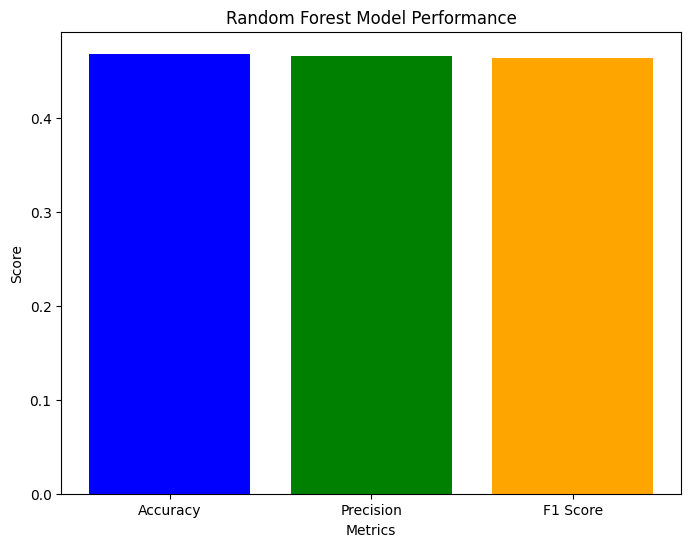

In [76]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Genre Prediction')
plt.show()

# Plot the evaluation metrics
metrics = ['Accuracy', 'Precision', 'F1 Score']
scores = [accuracy, precision, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Random Forest Model Performance')
plt.show()


Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')



Accuracy: 0.4187
Precision: 0.4167
F1 Score: 0.4176


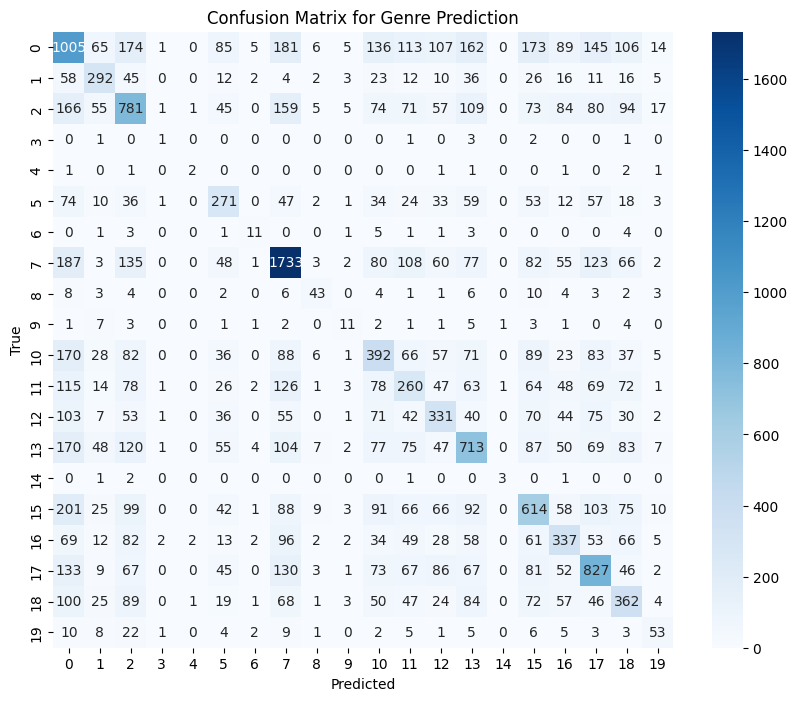

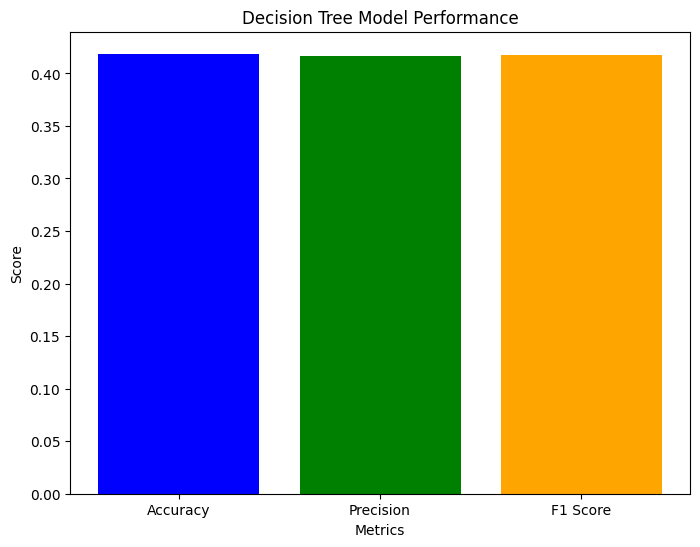

In [79]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Genre Prediction')
plt.show()

# Plot the evaluation metrics
metrics = ['Accuracy', 'Precision', 'F1 Score']
scores = [accuracy, precision, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Decision Tree Model Performance')
plt.show()


SVM

In [86]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Support Vector Machine Classifier
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.1718
Precision: 0.0783
F1 Score: 0.0805


c:\Users\tasmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


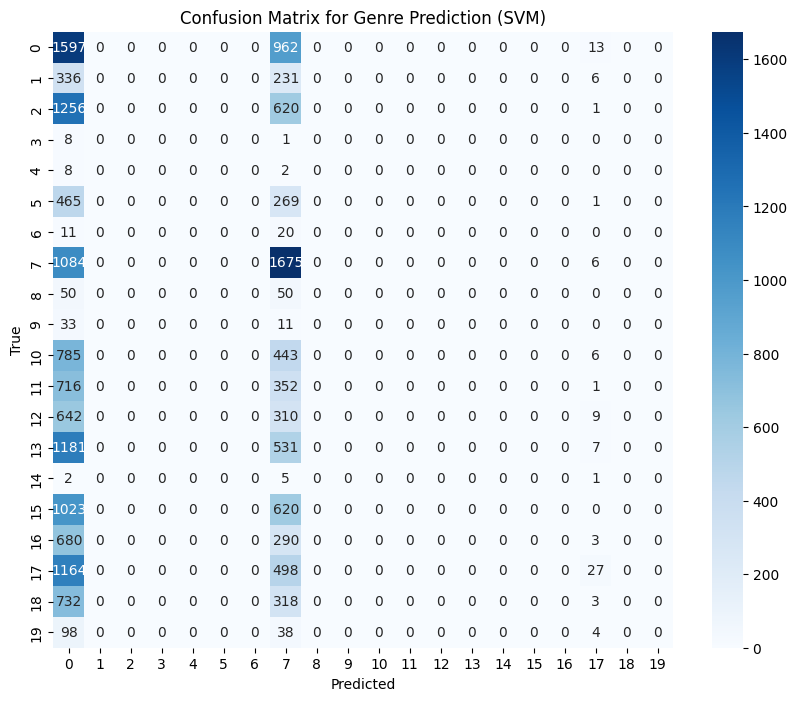

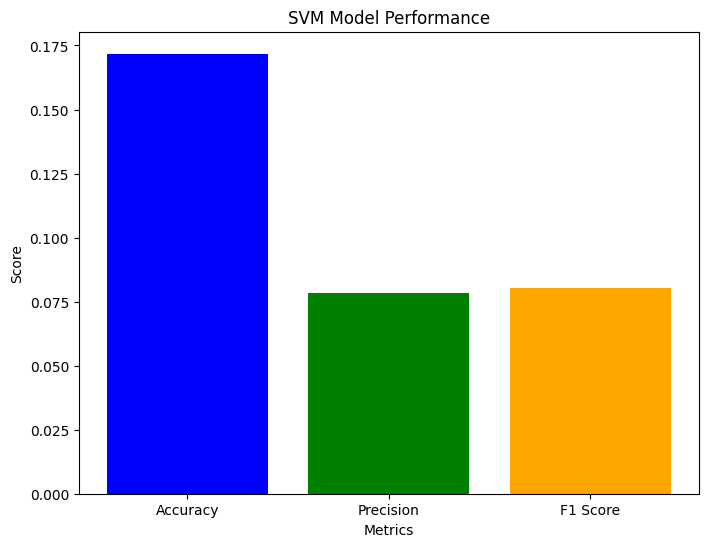

In [87]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Genre Prediction (SVM)')
plt.show()

# Plot the evaluation metrics
metrics = ['Accuracy', 'Precision', 'F1 Score']
scores = [accuracy, precision, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('SVM Model Performance')
plt.show()

Naive Bayes

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features to ensure non-negative values
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Naive Bayes model (Multinomial Naive Bayes works well with categorical data)
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')




Accuracy: 0.1528
Precision: 0.0692
F1 Score: 0.0578


c:\Users\tasmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


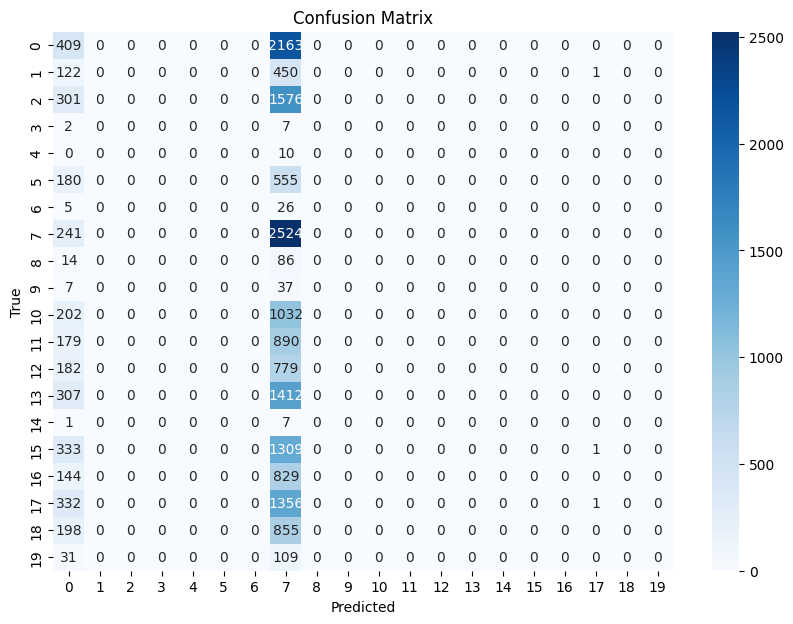

In [91]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the KNN classifier
# You can adjust n_neighbors to control the number of neighbors to consider for classification
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')



Accuracy: 0.4664
Precision: 0.4742
F1 Score: 0.4658


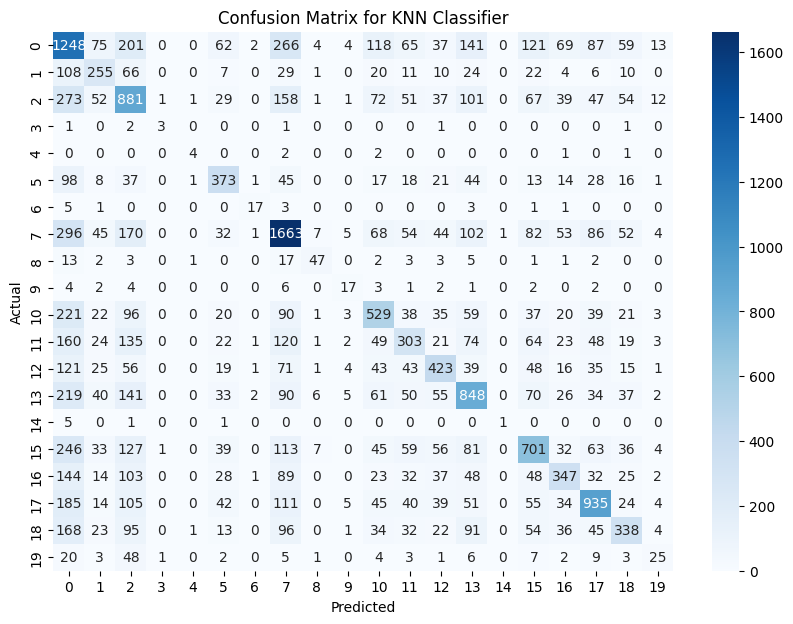

In [96]:
# Optional: Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()
